In [1]:
import os
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# load final combined csv file
final_combined_df_cleaned_fp = './data/1.final_combined_df_cleaned.csv'
final_combined_df_cleaned = pd.read_csv(final_combined_df_cleaned_fp)

In [3]:
X_filled = final_combined_df_cleaned.drop(['lifetime', 'id', 'Filename', 'SMILES'], axis=1)
y = final_combined_df_cleaned['lifetime']
X_filled.shape, y.shape

((363, 4958), (363,))

In [4]:
X_train, X_test= train_test_split(X_filled, test_size=0.1, random_state=1)
y_train, y_test = train_test_split(y, test_size=0.1, random_state=1)

In [5]:
model = RandomForestRegressor(n_estimators=300, max_depth=3, random_state=1)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=300, random_state=1)

In [6]:
# 获取特征的重要性
feature_importances = model.feature_importances_
# 设置一个阈值，删除低于该阈值的重要性特征
importance_threshold = 0.01 # 根据实际情况调整  # 0.005/33/0.02   0.01/33
important_features = np.array(X_filled.columns)[feature_importances > importance_threshold]
important_features, len(important_features)

(array(['MaxEStateIndex', 'MinEStateIndex', 'MinAbsEStateIndex',
        'MaxPartialCharge', 'BCUT2D_MWHI', 'BCUT2D_MRLOW', 'CM_14',
        'CM_143', 'CM_542', 'CM_676', 'CM_826', 'CM_1354', 'CM_1623',
        'CM_1891', 'CM_2165'], dtype=object),
 15)

In [7]:
# 保留重要的特征
X_reduced = X_filled[important_features]

# '''在检查是否有nan和Inf数值'''
# inf_values = X_reduced.isin([np.inf, -np.inf]).sum().sum()
# nan_values = X_reduced.isna().sum().sum()
# inf_values, nan_values

# 更新 DataFrame
final_combined_df_reduced = X_reduced.copy()
final_combined_df_reduced['lifetime'] = y
final_combined_df_reduced

,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,MaxPartialCharge,BCUT2D_MWHI,BCUT2D_MRLOW,CM_14,CM_143,CM_542,CM_676,CM_826,CM_1354,CM_1623,CM_1891,CM_2165,lifetime
0,9.793981,-0.379630,0.379630,0.194514,16.171947,-0.133537,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009525
1,11.997107,-0.021721,0.021721,0.208513,126.915758,0.466066,128.485427,97.125979,25.193210,9.522366,0.000000,21.990788,9.522366,14.545520,0.000000,0.001015
2,10.377891,0.571389,0.571389,0.160927,16.507769,0.111797,0.000000,14.545455,25.193210,43.635033,0.000000,0.000000,0.000000,0.000000,0.000000,0.027435
3,12.101296,-0.064074,0.064074,0.194013,16.144174,0.097888,19.394027,16.795767,25.192442,21.817517,0.000000,9.522366,8.246545,43.636364,0.000000,0.001420
4,10.945093,0.030046,0.030046,0.163022,16.466034,0.101012,0.000000,19.394027,25.192442,14.545520,0.000000,0.000000,0.000000,0.000000,0.000000,0.000101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,4.277870,0.058102,0.058102,0.000000,0.000000,0.000000,0.000000,152.827791,17.052600,18.849061,0.000000,0.000000,0.000000,0.000000,0.000000,0.003018
359,4.484972,0.787037,0.787037,0.114650,32.142175,1.495429,39.638514,31.580750,15.275802,16.343139,13.863664,14.786577,16.492708,25.192442,16.492923,22.406453
360,4.323810,0.944480,0.944480,0.112190,32.141875,1.651758,28.265390,71.912172,12.779755,31.464592,0.000000,21.818182,43.639614,12.103014,0.000000,0.811030
361,4.378565,0.583369,0.583369,0.212617,32.140758,1.339437,27.340339,23.143897,16.710214,14.909516,0.000000,43.639614,25.193210,21.818182,0.000000,0.092019


In [8]:
X = final_combined_df_reduced.drop('lifetime', axis=1)  # 特征
y = final_combined_df_reduced['lifetime']               # 目标变量

In [9]:
for random_state in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)  # 1  28/0.7
    '''找到预测最好的参数值'''
    # a = [150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]
    # a = [70,80,90,100,110,120,130,140,150,160,170,180,190,200]
#     a = [50,60,70]
    a = [50]
    for n in a:
        model_ = RandomForestRegressor(n_estimators=n, max_depth=3, random_state=1)
        model_.fit(X_train, y_train)
        # 对测试集进行预测
        y_pred = model_.predict(X_test)
        # 评估模型性能
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        if r2>0.6:
            print('random_state:\t', random_state)
#             print(f"n_estimators{n}")
#             print(f"Mean Squared Error (MSE): {mse}")
            print(f"R^2 Score: {r2}")
#             print("\n")

random_state:	 2
R^2 Score: 0.6891610964953712
random_state:	 5
R^2 Score: 0.70345364382857
random_state:	 6
R^2 Score: 0.6633786909599826
random_state:	 9
R^2 Score: 0.8236968840735487
random_state:	 12
R^2 Score: 0.7527805714773725
random_state:	 18
R^2 Score: 0.8008617428447048
random_state:	 28
R^2 Score: 0.7567157683530757
random_state:	 30
R^2 Score: 0.8122976402026039
random_state:	 40
R^2 Score: 0.6352931834899805
random_state:	 44
R^2 Score: 0.707446071418498
random_state:	 50
R^2 Score: 0.7394951318070819
random_state:	 60
R^2 Score: 0.8133931883308014
random_state:	 68
R^2 Score: 0.7716508684483198
random_state:	 75
R^2 Score: 0.906834384174882
random_state:	 76
R^2 Score: 0.876018870548827
random_state:	 99
R^2 Score: 0.8712400042252046


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=75)  # 1  28/0.7
'''找到预测最好的参数值'''
# a = [150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]
# a = [70,80,90,100,110,120,130,140,150,160,170,180,190,200]
#     a = [50,60,70]
a = [150]
for n in a:
    model_ = RandomForestRegressor(n_estimators=n, max_depth=5, random_state=1)
    model_.fit(X_train, y_train)
    # 对测试集进行预测
    y_pred = model_.predict(X_test)
    # 评估模型性能
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"n_estimators{n}")
#         print(f"Mean Squared Error (MSE): {mse}")
    print(f"R^2 Score: {r2}")

n_estimators150
R^2 Score: 0.9020617346001839


2. 找到模型拟合最好的参数： n_estimators=150, max_depth=5

In [11]:
X.columns

Index(['MaxEStateIndex', 'MinEStateIndex', 'MinAbsEStateIndex',
       'MaxPartialCharge', 'BCUT2D_MWHI', 'BCUT2D_MRLOW', 'CM_14', 'CM_143',
       'CM_542', 'CM_676', 'CM_826', 'CM_1354', 'CM_1623', 'CM_1891',
       'CM_2165'],
      dtype='object')

In [12]:
X = final_combined_df_reduced.drop('lifetime', axis=1)  # 特征
y = final_combined_df_reduced['lifetime']               # 目标变量

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=75)  # 1  28/0.7
model_ = RandomForestRegressor(n_estimators=150, max_depth=5, random_state=1)
model_.fit(X_train, y_train)
# 对测试集进行预测
y_pred = model_.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 
print(f"R^2 Score: {r2}")

R^2 Score: 0.9020617346001839


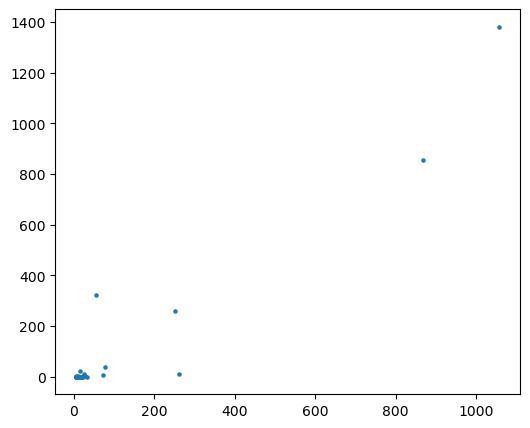

In [13]:
figsize = (6, 5)
plt.figure(1, figsize=figsize)
plt.scatter(y_pred, y_test, s=5)
# plt.axis([min(y_pred)-10,80, min(y_test)-10, 80])
plt.show()

In [48]:
# sorted(np.log10(y.values))

In [30]:
# # 获取lifetime列数值最大的前8个索引
# top_8_lifetime_indices = final_combined_df_reduced.nlargest(8, 'lifetime').index

# # 删除这些行
# final_combined_df_reduced_del_8 = final_combined_df_reduced.drop(top_8_lifetime_indices)
# final_combined_df_reduced_del_8.head()

In [34]:
# final_combined_df_reduced_del_8.shape

#### 为了可视化，对lifetime取对数再预测

In [65]:
# for i in range(100):
#     print('random_state:', i)
#     X = final_combined_df_reduced.drop('lifetime', axis=1)  # 特征
#     y = final_combined_df_reduced['lifetime']               # 目标变量
#     y = np.log10(y.values)

#     # 划分训练集和测试集
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)  # 1  28/0.7

#     '''找到预测最好的参数值'''
#     # a = [150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]
# #     a = [70,80,90,100,110,120,130,140,150,160,170,180,190,200]
#     a = [50,100,150,200,250]
#     for n in a:
#         model_ = RandomForestRegressor(n_estimators=n, max_depth=3, random_state=1)
#         model_.fit(X_train, y_train)
#         # 对测试集进行预测
#         y_pred = model_.predict(X_test)

#         # 评估模型性能
#         mse = mean_squared_error(y_test, y_pred)
#         r2 = r2_score(y_test, y_pred)
#         if r2>0.7:
#             print(f"n_estimators{n}")
#     #             print(f"Mean Squared Error (MSE): {mse}")
#             print(f"R^2 Score: {r2}")
#     #             print("\n")

In [16]:
X = final_combined_df_reduced.drop('lifetime', axis=1)  # 特征
y = final_combined_df_reduced['lifetime']               # 目标变量
y = np.log10(y.values)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=75)  # random_state=75

model_ = RandomForestRegressor(n_estimators=150, max_depth=3, random_state=1)
model_.fit(X_train, y_train)
# 对测试集进行预测
y_pred = model_.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 
print(f"R^2 Score: {r2}")

R^2 Score: 0.5817122062329017


In [17]:
X = final_combined_df_reduced.drop('lifetime', axis=1)  # 特征
y = final_combined_df_reduced['lifetime']               # 目标变量
y = np.log10(y.values)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=37)    # random_state=37
model_ = RandomForestRegressor(n_estimators=150, max_depth=3, random_state=1)
model_.fit(X_train, y_train)
# 对测试集进行预测
y_pred = model_.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 0.8894054840176603
R^2 Score: 0.7072415234697713


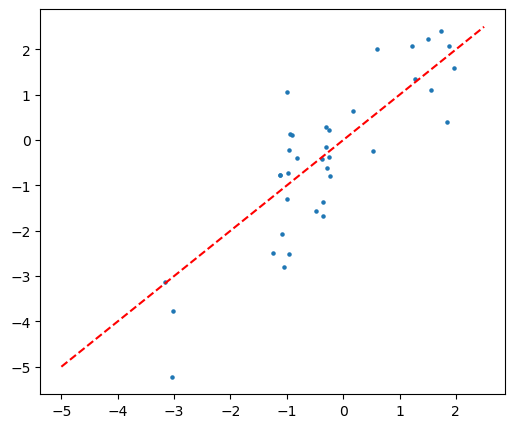

In [18]:
figsize = (6, 5)
plt.figure(1, figsize=figsize)
plt.scatter(y_pred, y_test, s=5)
plt.plot([-5, 2.5], [-5, 2.5], "r--")
# plt.axis([min(y_pred)-10,80, min(y_test)-10, 80])
plt.show()

#### lifetime取对数，特征归一化

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler1 = StandardScaler()
X = final_combined_df_reduced.drop('lifetime', axis=1)  # 特征
y = final_combined_df_reduced['lifetime']               # 目标变量
X_scaled = pd.DataFrame(scaler1.fit_transform(X),columns=X.columns, index=X.index)
y_lg = np.log10(y.values)

In [72]:
# for i in range(100):
#     print('random_state:', i)
#     # 划分训练集和测试集
#     X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_lg, test_size=0.1, random_state=i)  # 1  28/0.7

#     '''找到预测最好的参数值'''
#     # a = [150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]
# #     a = [70,80,90,100,110,120,130,140,150,160,170,180,190,200]
#     a = [50,100,150,200,250]
#     for n in a:
#         model_ = RandomForestRegressor(n_estimators=n, max_depth=3, random_state=1)
#         model_.fit(X_train, y_train)
#         # 对测试集进行预测
#         y_pred = model_.predict(X_test)

#         # 评估模型性能
#         mse = mean_squared_error(y_test, y_pred)
#         r2 = r2_score(y_test, y_pred)
#         if r2>0.7:
#             print(f"n_estimators{n}")
#     #             print(f"Mean Squared Error (MSE): {mse}")
#             print(f"R^2 Score: {r2}")
#     #             print("\n")

In [21]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_lg, test_size=0.1, random_state=37)
model_ = RandomForestRegressor(n_estimators=150, max_depth=3, random_state=1)
model_.fit(X_train, y_train)
# 对测试集进行预测
y_pred = model_.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 
print(f"R^2 Score: {r2}")
print(f"mse Score: {mse}")

R^2 Score: 0.7063927772480509
mse Score: 0.891983990208443


In [75]:
# figsize = (6, 5)
# plt.figure(1, figsize=figsize, dpi=300)
# plt.scatter(y_pred, y_test, s=5)
# plt.plot([-5, 2.5], [-5, 2.5], "r--")
# # plt.axis([min(y_pred)-10,80, min(y_test)-10, 80])
# plt.show()

总结，对特征归一化，没有提高预测效果

In [22]:
final_combined_df_cleaned 

,id,lifetime,Filename,SMILES,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,qed,HeavyAtomMolWt,MaxPartialCharge,...,CM_14310,CM_14311,CM_14312,CM_14313,CM_14445,CM_14446,CM_14447,CM_14580,CM_14581,CM_14715
0,1,0.009525,ps1.sdf,CC(=O)C(C)=O,9.793981,-0.379630,0.379630,0.425942,80.042,0.194514,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.001015,ps2.sdf,O=c1c(I)cc2cc3cc(I)c(O)c(I)c3oc-2c1I,11.997107,-0.021721,0.021721,0.263082,711.756,0.208513,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.027435,ps3.sdf,COc1ccc(C=O)cc1OC,10.377891,0.571389,0.571389,0.638385,156.096,0.160927,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.001420,ps4.sdf,O=C1c2ccccc2C(=O)c2ccccc21,12.101296,-0.064074,0.064074,0.568337,200.152,0.194013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.000101,ps5.sdf,COc1ccccc1C(C)=O,10.945093,0.030046,0.030046,0.601659,140.097,0.163022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,201,0.003018,acceptor201.sdf,c1c2c(cc3n[se]nc13)N=[Se]=N2,4.277870,0.058102,0.058102,0.580195,286.014,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
359,202,22.406453,acceptor202.sdf,c1c2c(c(-c3c4c(cc5nsnc35)N=S=N4)c3nsnc13)N=S=N2,4.484972,0.787037,0.787037,0.404248,384.456,0.114650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
360,203,0.811030,acceptor203.sdf,c1cc2c(ccc3nsnc32)c2nsnc12,4.323810,0.944480,0.944480,0.477024,240.272,0.112190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
361,204,0.092019,acceptor204.sdf,c1c2c(cc3nc4nsnc4nc13)N=S=N2,4.378565,0.583369,0.583369,0.476945,244.264,0.212617,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
keep_columns = ['lifetime', 'Filename'] + important_features.tolist()
len(important_features), len(keep_columns)
final_combined_df_cleaned = final_combined_df_cleaned[keep_columns]
final_combined_df_cleaned['Filename'] = final_combined_df_cleaned['Filename'].str.replace('.sdf', '', regex=True)
final_combined_df_cleaned.head()

C:\Users\yxy\AppData\Local\Temp\ipykernel_8164\2699581794.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_combined_df_cleaned['Filename'] = final_combined_df_cleaned['Filename'].str.replace('.sdf', '', regex=True)


,lifetime,Filename,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,MaxPartialCharge,BCUT2D_MWHI,BCUT2D_MRLOW,CM_14,CM_143,CM_542,CM_676,CM_826,CM_1354,CM_1623,CM_1891,CM_2165
0,0.009525,ps1,9.793981,-0.379630,0.379630,0.194514,16.171947,-0.133537,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
1,0.001015,ps2,11.997107,-0.021721,0.021721,0.208513,126.915758,0.466066,128.485427,97.125979,25.193210,9.522366,0.0,21.990788,9.522366,14.545520,0.0
2,0.027435,ps3,10.377891,0.571389,0.571389,0.160927,16.507769,0.111797,0.000000,14.545455,25.193210,43.635033,0.0,0.000000,0.000000,0.000000,0.0
3,0.001420,ps4,12.101296,-0.064074,0.064074,0.194013,16.144174,0.097888,19.394027,16.795767,25.192442,21.817517,0.0,9.522366,8.246545,43.636364,0.0
4,0.000101,ps5,10.945093,0.030046,0.030046,0.163022,16.466034,0.101012,0.000000,19.394027,25.192442,14.545520,0.0,0.000000,0.000000,0.000000,0.0


In [24]:
'''对lifetime去对数'''
final_combined_df_cleaned['lifetime'] = np.log10(final_combined_df_cleaned['lifetime'].values)
final_combined_df_cleaned.head()

C:\Users\yxy\AppData\Local\Temp\ipykernel_8164\2724572235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_combined_df_cleaned['lifetime'] = np.log10(final_combined_df_cleaned['lifetime'].values)


,lifetime,Filename,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,MaxPartialCharge,BCUT2D_MWHI,BCUT2D_MRLOW,CM_14,CM_143,CM_542,CM_676,CM_826,CM_1354,CM_1623,CM_1891,CM_2165
0,-2.021156,ps1,9.793981,-0.379630,0.379630,0.194514,16.171947,-0.133537,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
1,-2.993525,ps2,11.997107,-0.021721,0.021721,0.208513,126.915758,0.466066,128.485427,97.125979,25.193210,9.522366,0.0,21.990788,9.522366,14.545520,0.0
2,-1.561702,ps3,10.377891,0.571389,0.571389,0.160927,16.507769,0.111797,0.000000,14.545455,25.193210,43.635033,0.0,0.000000,0.000000,0.000000,0.0
3,-2.847714,ps4,12.101296,-0.064074,0.064074,0.194013,16.144174,0.097888,19.394027,16.795767,25.192442,21.817517,0.0,9.522366,8.246545,43.636364,0.0
4,-3.995537,ps5,10.945093,0.030046,0.030046,0.163022,16.466034,0.101012,0.000000,19.394027,25.192442,14.545520,0.0,0.000000,0.000000,0.000000,0.0


In [26]:
final_combined_df_cleaned.to_csv('./data/2.final_rdkit_descriptors.csv', index=False)

In [27]:
final_rdkit_descriptors_df = pd.read_csv('./data/2.final_rdkit_descriptors.csv')
final_rdkit_descriptors_df

,lifetime,Filename,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,MaxPartialCharge,BCUT2D_MWHI,BCUT2D_MRLOW,CM_14,CM_143,CM_542,CM_676,CM_826,CM_1354,CM_1623,CM_1891,CM_2165
0,-2.021156,ps1,9.793981,-0.379630,0.379630,0.194514,16.171947,-0.133537,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-2.993525,ps2,11.997107,-0.021721,0.021721,0.208513,126.915758,0.466066,128.485427,97.125979,25.193210,9.522366,0.000000,21.990788,9.522366,14.545520,0.000000
2,-1.561702,ps3,10.377891,0.571389,0.571389,0.160927,16.507769,0.111797,0.000000,14.545455,25.193210,43.635033,0.000000,0.000000,0.000000,0.000000,0.000000
3,-2.847714,ps4,12.101296,-0.064074,0.064074,0.194013,16.144174,0.097888,19.394027,16.795767,25.192442,21.817517,0.000000,9.522366,8.246545,43.636364,0.000000
4,-3.995537,ps5,10.945093,0.030046,0.030046,0.163022,16.466034,0.101012,0.000000,19.394027,25.192442,14.545520,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,-2.520281,acceptor201,4.277870,0.058102,0.058102,0.000000,0.000000,0.000000,0.000000,152.827791,17.052600,18.849061,0.000000,0.000000,0.000000,0.000000,0.000000
359,1.350373,acceptor202,4.484972,0.787037,0.787037,0.114650,32.142175,1.495429,39.638514,31.580750,15.275802,16.343139,13.863664,14.786577,16.492708,25.192442,16.492923
360,-0.090963,acceptor203,4.323810,0.944480,0.944480,0.112190,32.141875,1.651758,28.265390,71.912172,12.779755,31.464592,0.000000,21.818182,43.639614,12.103014,0.000000
361,-1.036122,acceptor204,4.378565,0.583369,0.583369,0.212617,32.140758,1.339437,27.340339,23.143897,16.710214,14.909516,0.000000,43.639614,25.193210,21.818182,0.000000


In [28]:
final_rdkit_descriptors_df = pd.read_csv('./data/2.final_rdkit_descriptors.csv')
final_rdkit_descriptors_df['Filename'] = (final_rdkit_descriptors_df['Filename']
    .str.replace(r'^ps', 'p', regex=True).str.replace(r'^acceptor', 'a', regex=True))
rdkit_columns = final_rdkit_descriptors_df.columns # 获取 final_rdkit_descriptors_df 的所有列名
rdkit_non_cm_columns = [col for col in rdkit_columns if not col.startswith('CM')] # 过滤掉以 'CM' 开头的列名
final_rdkit_descriptors_df = final_rdkit_descriptors_df[rdkit_non_cm_columns]
final_rdkit_descriptors_without_CMdescriptors_path = './data/final_rdkit_descriptors_without_CM.csv'
final_rdkit_descriptors_df.to_csv(final_rdkit_descriptors_without_CMdescriptors_path, index=False)